In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [92]:
titanic_df = pd.read_csv('train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Mission : It's Your Turn!

## 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [4]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Pclass + Fare -> Survived
- 생존자들이 같은 등급을 타더라도 더 높은 비용을 냄

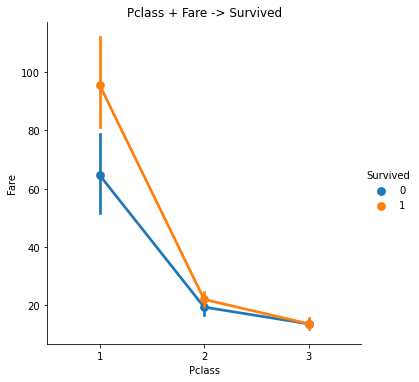

In [188]:
sns.catplot(x='Pclass', y='Fare', hue='Survived',  kind='point', data=titanic_df)

plt.title('Pclass + Fare -> Survived')

plt.show()

### Parch + SibSp + Age
- 20대 초중반과 30대 후반에서 가족단위로 탑승한 비율이 높았음

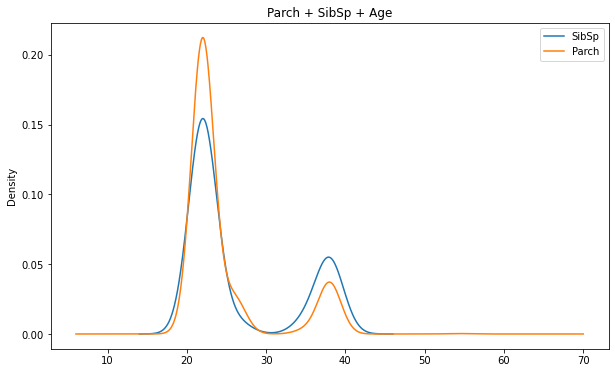

In [189]:
plt.figure(figsize=(10,6))
titanic_df['Age'][titanic_df['SibSp']].plot(kind='kde')
titanic_df['Age'][titanic_df['Parch']].plot(kind='kde')

plt.legend(['SibSp', 'Parch'])

plt.title('Parch + SibSp + Age')

plt.show()

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


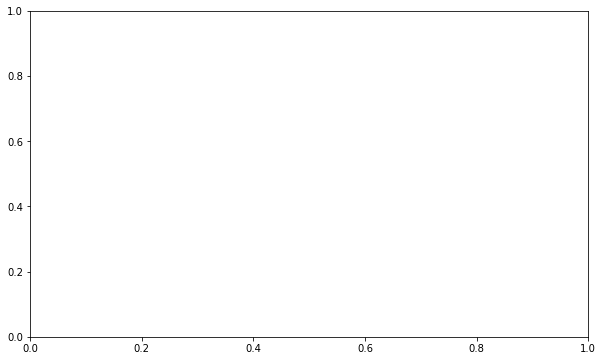

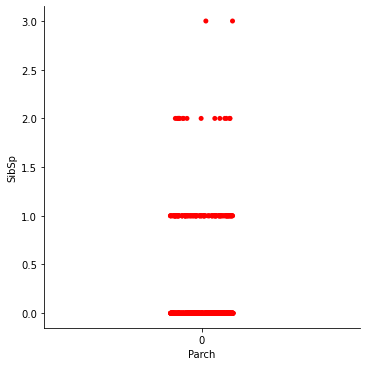

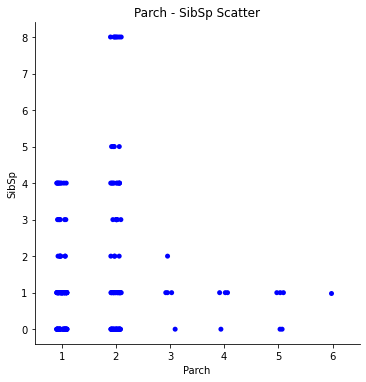

In [198]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.catplot(x='Parch', y='SibSp', data=titanic_df[titanic_df['Parch'] == 0], color='r')
sns.catplot(x='Parch', y='SibSp', data=titanic_df[titanic_df['Parch'] != 0], color='b')

plt.title('Parch - SibSp Scatter')
plt.show()